In [1]:
import geopandas as pd
import contextily as ctx # Used for contextual basemaps
import matplotlib.pyplot as plt
from geocube.api.core import make_geocube # Used for rasterizing
import os
import shapely
import imageio
import numpy as np
from IPython.display import Image
plt.rcParams['figure.figsize'] = (20, 20)
os.listdir("input")

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


['statsnzregional-council-2021-clipped-generalised-SHP.zip',
 'lris-lcdb-v50-land-cover-database-version-50-mainland-new-zealand-SHP.zip']

First, read regional council bounds. This geometry will be used to clip NZ-wide datasets to just the region of interest, Auckland

epsg:2193
CPU times: user 1.64 s, sys: 1.04 s, total: 2.68 s
Wall time: 14.1 s


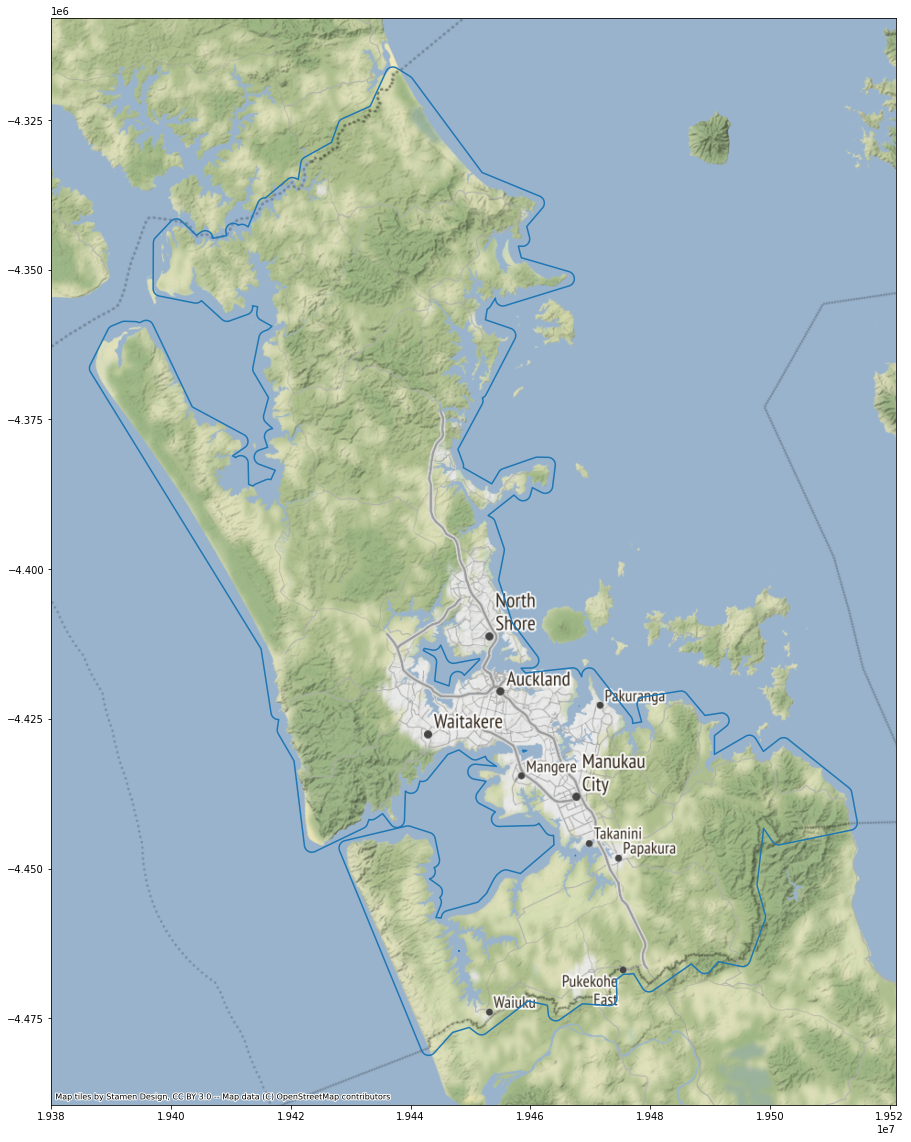

In [2]:
%%time
REGC = pd.read_file("input/statsnzregional-council-2021-clipped-generalised-SHP.zip")
AKL = REGC[REGC.REGC2021_1 == "Auckland Region"].copy()
# Filter out islands
AKL["geometry"] = max(AKL.geometry.explode(), key=lambda a: a.area)
# Coordinate reference system (projection)
print(AKL.crs)
# Simplify geometry to speed up clip operations
AKL = AKL.simplify(1000).buffer(1000)
ax = AKL.to_crs(epsg=3857).boundary.plot()
ctx.add_basemap(ax)

In [3]:
%%time
df = pd.read_file("zip://input/lris-lcdb-v50-land-cover-database-version-50-mainland-new-zealand-SHP.zip!lcdb-v50-land-cover-database-version-50-mainland-new-zealand.shp")
df

CPU times: user 1min 15s, sys: 1.88 s, total: 1min 16s
Wall time: 1min 16s


,Name_2018,Name_2012,Name_2008,Name_2001,Name_1996,Class_2018,Class_2012,Class_2008,Class_2001,Class_1996,...,Wetland_96,Onshore_18,Onshore_12,Onshore_08,Onshore_01,Onshore_96,EditAuthor,EditDate,LCDB_UID,geometry
0,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,46,46,46,46,46,...,yes,no,no,no,no,no,Terralink,2004-06-30,lcdb2000096676,"POLYGON ((1613722.435 5425797.372, 1613723.153..."
1,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,46,46,46,46,46,...,yes,no,no,no,no,no,Regional Council,2019-12-01,lcdb1000513359,"POLYGON ((1816770.219 5947804.627, 1816778.549..."
2,Mangrove,Mangrove,Mangrove,Mangrove,Mangrove,70,70,70,70,70,...,yes,no,no,no,no,no,Terralink,2004-06-30,lcdb1000182160,"POLYGON ((1715672.186 5958842.706, 1715665.266..."
3,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,46,46,46,46,46,...,yes,no,no,no,no,no,Terralink,2004-06-30,lcdb1000065930,"POLYGON ((1705330.918 6088979.740, 1705316.037..."
4,Estuarine Open Water,Estuarine Open Water,Estuarine Open Water,Estuarine Open Water,Estuarine Open Water,22,22,22,22,22,...,no,no,no,no,no,no,Regional Council,2019-12-01,lcdb1000065472,"POLYGON ((1761684.636 5789742.527, 1761680.213..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511099,Low Producing Grassland,Low Producing Grassland,Low Producing Grassland,Manuka and/or Kanuka,Low Producing Grassland,41,41,41,52,41,...,no,yes,yes,yes,yes,yes,Landcare Research,2019-12-01,lcdb1000505810,"POLYGON ((1785112.194 5684560.595, 1785108.792..."
511100,Indigenous Forest,Indigenous Forest,Indigenous Forest,Indigenous Forest,Indigenous Forest,69,69,69,69,69,...,no,yes,yes,yes,yes,yes,Landcare Research,2019-12-01,lcdb2000193885,"POLYGON ((1607510.750 5432591.699, 1607542.075..."
511101,Exotic Forest,Exotic Forest,Exotic Forest,Exotic Forest,Exotic Forest,71,71,71,71,71,...,no,yes,yes,yes,yes,yes,Landcare Research,2011-06-30,lcdb2000219027,"POLYGON ((1603592.310 5269947.382, 1603608.224..."
511102,Herbaceous Freshwater Vegetation,Herbaceous Freshwater Vegetation,Herbaceous Freshwater Vegetation,Herbaceous Freshwater Vegetation,Herbaceous Freshwater Vegetation,45,45,45,45,45,...,yes,yes,yes,yes,yes,yes,Regional Council,2014-06-30,lcdb1000417326,"POLYGON ((1822629.596 5477414.337, 1822617.531..."


In [4]:
print(df.columns)
print(df.crs)

Index(['Name_2018', 'Name_2012', 'Name_2008', 'Name_2001', 'Name_1996',
       'Class_2018', 'Class_2012', 'Class_2008', 'Class_2001', 'Class_1996',
       'Wetland_18', 'Wetland_12', 'Wetland_08', 'Wetland_01', 'Wetland_96',
       'Onshore_18', 'Onshore_12', 'Onshore_08', 'Onshore_01', 'Onshore_96',
       'EditAuthor', 'EditDate', 'LCDB_UID', 'geometry'],
      dtype='object')
epsg:2193


In [5]:
%%time
df = pd.clip(df, AKL)
df

CPU times: user 47.4 s, sys: 6.4 ms, total: 47.4 s
Wall time: 47.4 s


,Name_2018,Name_2012,Name_2008,Name_2001,Name_1996,Class_2018,Class_2012,Class_2008,Class_2001,Class_1996,...,Wetland_96,Onshore_18,Onshore_12,Onshore_08,Onshore_01,Onshore_96,EditAuthor,EditDate,LCDB_UID,geometry
2,Mangrove,Mangrove,Mangrove,Mangrove,Mangrove,70,70,70,70,70,...,yes,no,no,no,no,no,Terralink,2004-06-30,lcdb1000182160,"POLYGON ((1715665.266 5958806.721, 1715664.048..."
16,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,46,46,46,46,46,...,yes,no,no,no,no,no,Terralink,2004-06-30,lcdb1000065812,"POLYGON ((1735169.489 5987226.364, 1735168.055..."
17,Mangrove,Mangrove,Mangrove,Mangrove,Mangrove,70,70,70,70,70,...,yes,no,no,no,no,no,Terralink,2004-06-30,lcdb1000181805,"POLYGON ((1752429.297 5883428.336, 1752460.885..."
21,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,46,46,46,46,46,...,yes,no,no,no,no,no,Terralink,2004-06-30,lcdb1000065676,"POLYGON ((1752492.714 5919926.707, 1752459.411..."
25,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,Herbaceous Saline Vegetation,46,46,46,46,46,...,yes,no,no,no,no,no,Terralink,2004-06-30,lcdb1000065799,"POLYGON ((1717296.502 5975470.039, 1717272.721..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511011,Urban Parkland/Open Space,Urban Parkland/Open Space,Urban Parkland/Open Space,Urban Parkland/Open Space,Urban Parkland/Open Space,2,2,2,2,2,...,no,yes,yes,yes,yes,yes,Terralink,2004-06-30,lcdb1000005560,"POLYGON ((1769859.473 5899341.257, 1769881.009..."
511049,Broadleaved Indigenous Hardwoods,Broadleaved Indigenous Hardwoods,Broadleaved Indigenous Hardwoods,Broadleaved Indigenous Hardwoods,Broadleaved Indigenous Hardwoods,54,54,54,54,54,...,no,yes,yes,yes,yes,yes,Terralink,2004-06-30,lcdb1000121259,"POLYGON ((1780199.041 5916278.346, 1780163.141..."
511052,Broadleaved Indigenous Hardwoods,Broadleaved Indigenous Hardwoods,Broadleaved Indigenous Hardwoods,Broadleaved Indigenous Hardwoods,Broadleaved Indigenous Hardwoods,54,54,54,54,54,...,no,yes,yes,yes,yes,yes,Landcare Research,2011-06-30,lcdb1000126312,"POLYGON ((1755630.009 5911366.665, 1755630.228..."
511074,Deciduous Hardwoods,Deciduous Hardwoods,Deciduous Hardwoods,Deciduous Hardwoods,Deciduous Hardwoods,68,68,68,68,68,...,no,yes,yes,yes,yes,yes,Landcare Research,2011-06-30,lcdb1000137983,"POLYGON ((1763943.669 5911004.429, 1763949.749..."


In [6]:
df.Name_2018.value_counts()

Exotic Forest                                3981
Indigenous Forest                            3673
Manuka and/or Kanuka                         2282
Broadleaved Indigenous Hardwoods             1788
Built-up Area (settlement)                   1350
High Producing Exotic Grassland              1326
Mangrove                                     1151
Urban Parkland/Open Space                    1099
Estuarine Open Water                          441
Orchard, Vineyard or Other Perennial Crop     436
Short-rotation Cropland                       362
Lake or Pond                                  326
Herbaceous Saline Vegetation                  303
Low Producing Grassland                       291
Gorse and/or Broom                            287
Forest - Harvested                            266
Sand or Gravel                                252
Deciduous Hardwoods                           201
Surface Mine or Dump                          132
Mixed Exotic Shrubland                        120


In [7]:
def simplify_classes(code):
    if code in [1, 2, 5]:
        return 1, "Urban"
    elif code in [68,69,71]:
        return 2, "Vegetation"
    elif code in [0,20,21,22,45,46]:
        return 3, "Water"
    else:
        return 4, "Other"

summary = []
years = [1996, 2001, 2008, 2012, 2018]
for year in years:
    print(year)
    class_year = f"Class_{year}"
    df[class_year + "_simplified_code"] = df[class_year].apply(lambda c: simplify_classes(c)[0])
    df[class_year + "_simplified_name"] = df[class_year].apply(lambda c: simplify_classes(c)[1])
    summary.append(df[class_year + "_simplified_name"].value_counts())

1996
2001
2008
2012
2018


<AxesSubplot:>

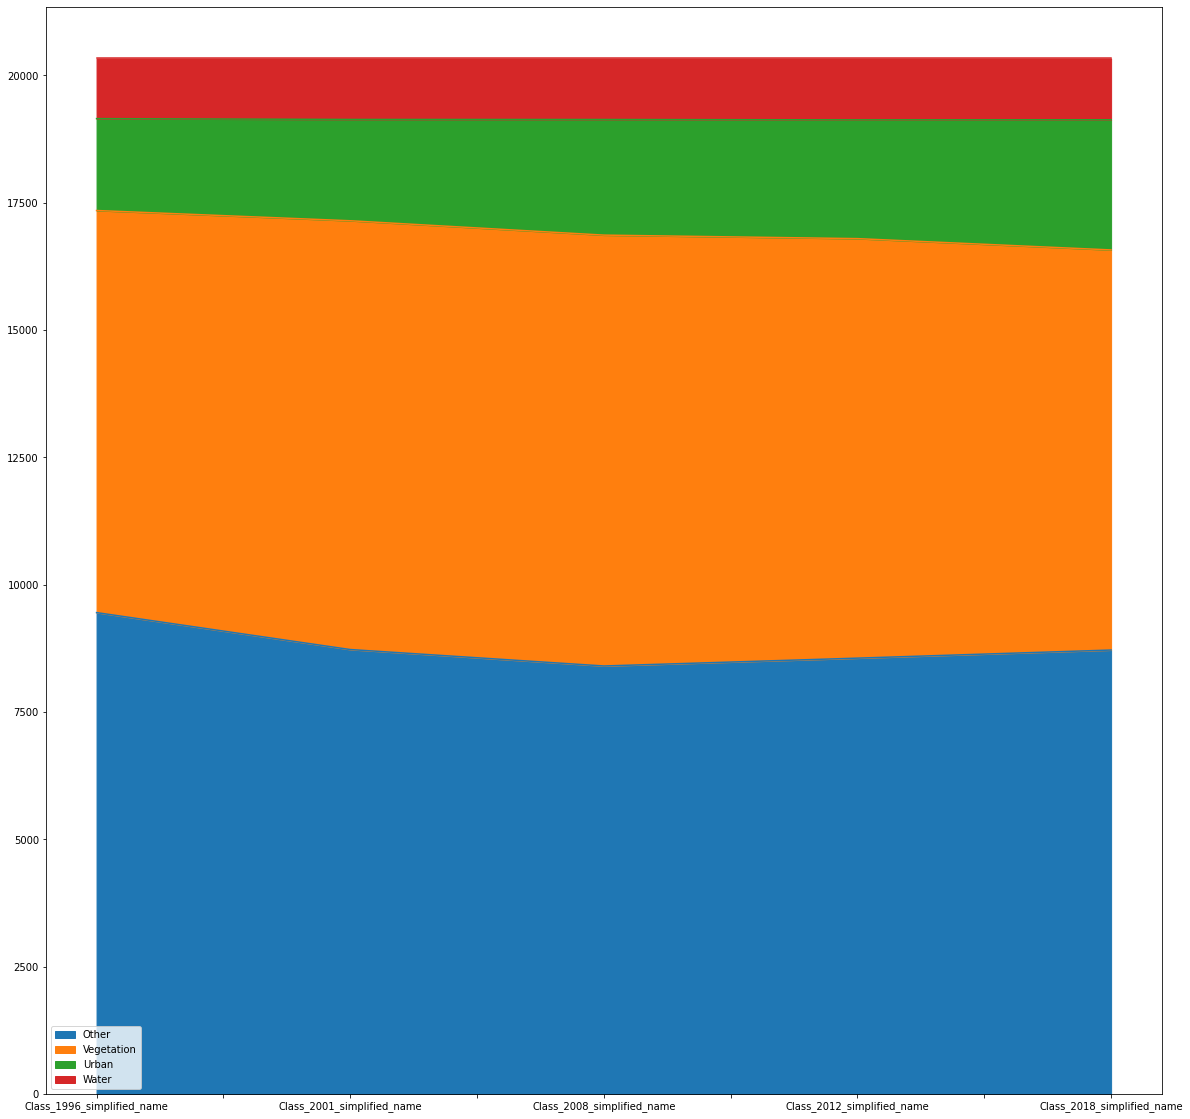

In [8]:
pd.GeoDataFrame(summary).plot.area()

In [9]:
%%capture
# %%Capture suppresses output
ims = []
years = [1996, 2001, 2008, 2012, 2018]
for year in years:
    ax = df.plot(column=f'Class_{year}_simplified_name', legend=True)
    ax.set_title(year)
    canvas = ax.figure.canvas
    canvas.draw() # draw the canvas, cache the renderer
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(canvas.get_width_height()[::-1] + (3,))
    ims.append(image)

imageio.mimsave("land_use.gif", ims, fps=1)

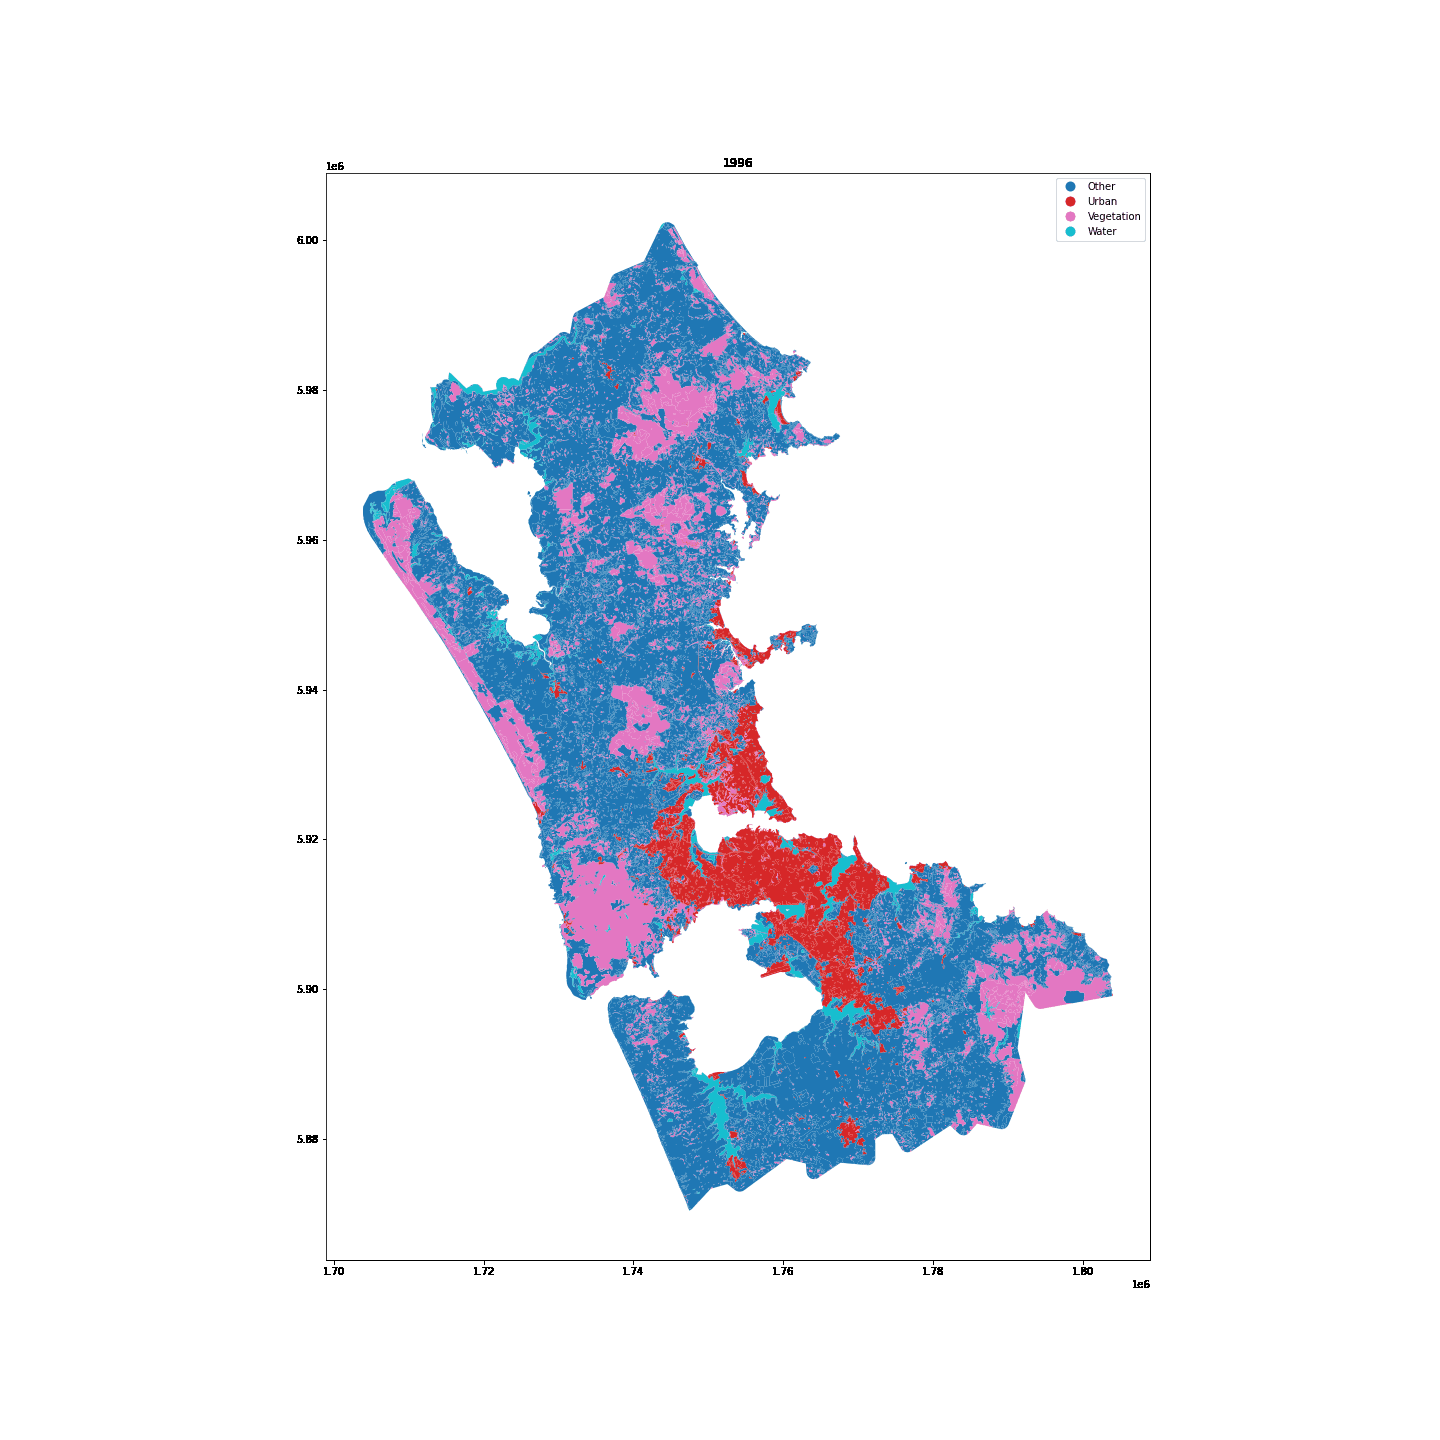

In [10]:
with open('land_use.gif','rb') as file:
    display(Image(file.read()))

In [11]:
cols = [f"Class_{year}_simplified_code" for year in years]
cols

['Class_1996_simplified_code',
 'Class_2001_simplified_code',
 'Class_2008_simplified_code',
 'Class_2012_simplified_code',
 'Class_2018_simplified_code']

In [12]:
%%time
geocube = make_geocube(
    vector_data=df,
    output_crs="epsg:2193",
    measurements=cols,
    resolution=(-100, 100)
)
geocube

CPU times: user 22.6 s, sys: 49.7 ms, total: 22.7 s
Wall time: 22.7 s


<xarray.Dataset>
Dimensions:                     (x: 1001, y: 1320)
Coordinates:
  * y                           (y) float64 6.002e+06 6.002e+06 ... 5.87e+06
  * x                           (x) float64 1.704e+06 1.704e+06 ... 1.804e+06
    spatial_ref                 int64 0
Data variables:
    Class_1996_simplified_code  (y, x) float64 nan nan nan nan ... nan nan nan
    Class_2001_simplified_code  (y, x) float64 nan nan nan nan ... nan nan nan
    Class_2008_simplified_code  (y, x) float64 nan nan nan nan ... nan nan nan
    Class_2012_simplified_code  (y, x) float64 nan nan nan nan ... nan nan nan
    Class_2018_simplified_code  (y, x) float64 nan nan nan nan ... nan nan nan
Attributes:
    grid_mapping:  spatial_ref

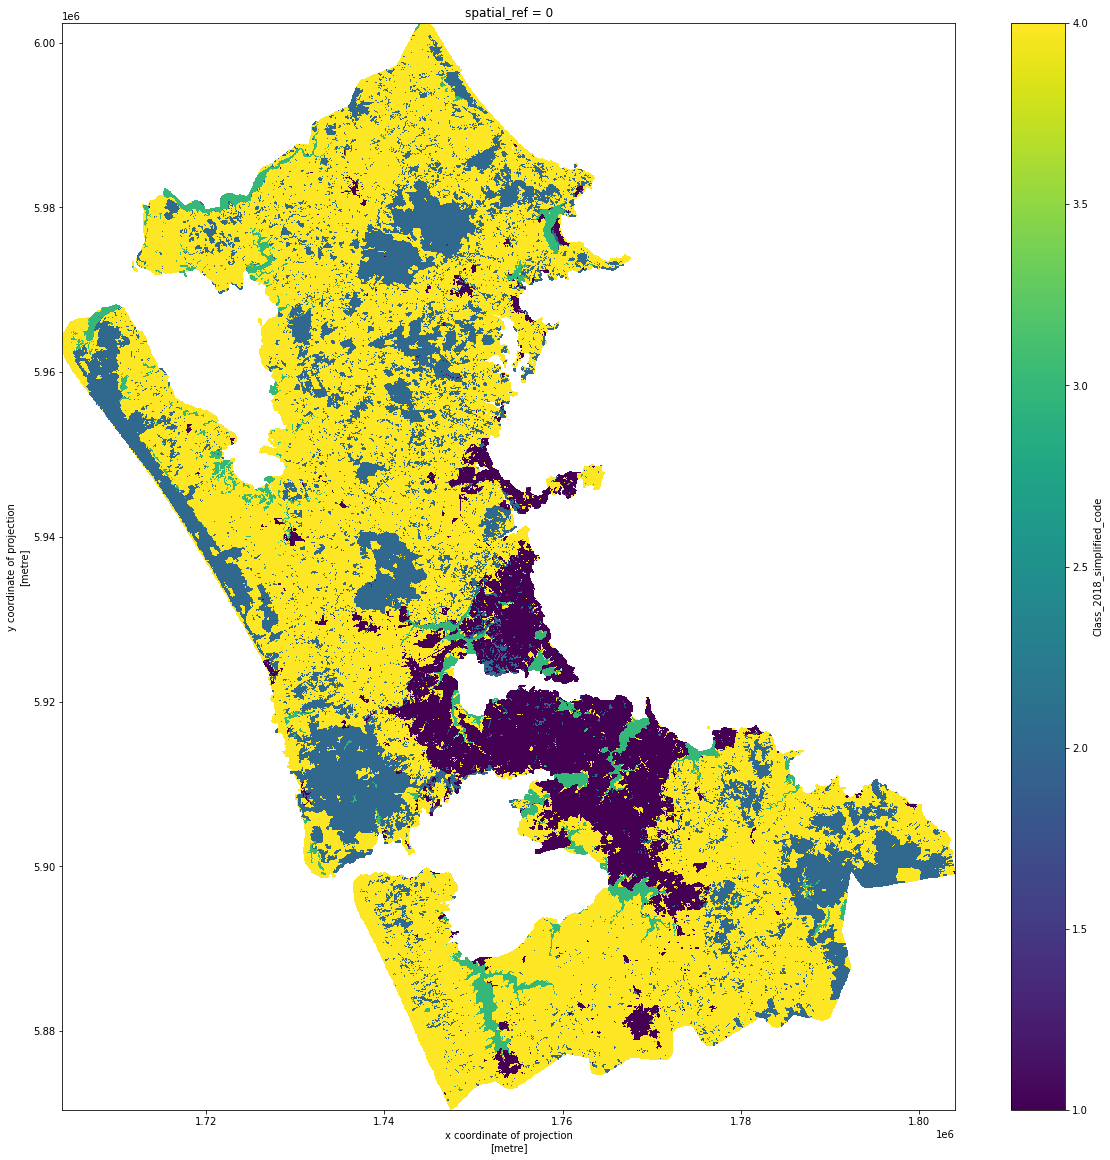

In [13]:
geocube.Class_2018_simplified_code.plot()

In [17]:
for year in years:
    print(year)
    outfile = f"output/land_use_{year}.tif"
    if not os.path.isfile(outfile):
        geocube[f"Class_{year}_simplified_code"].rio.to_raster(outfile)

1996
2001
2008
2012
2018


In [18]:
!ls -Ggh output

total 51M
-rw-r--r-- 1 11M Apr 15 10:25 land_use_1996.tif
-rw-r--r-- 1 11M Apr 15 10:25 land_use_2001.tif
-rw-r--r-- 1 11M Apr 15 10:25 land_use_2008.tif
-rw-r--r-- 1 11M Apr 15 10:25 land_use_2012.tif
-rw-r--r-- 1 11M Apr 15 10:25 land_use_2018.tif
